In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mall customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df = df.drop("CustomerID", axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df = df.rename(columns = {'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

In [7]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df1 = df.copy()
df2 = df.copy()

In [11]:
df.shape

(200, 4)

In [12]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Visualization

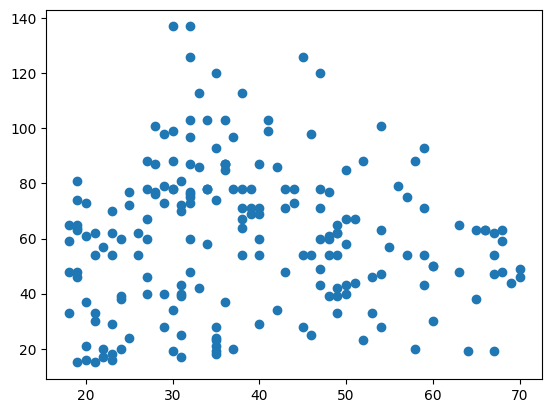

In [13]:
plt.scatter(df.age, df.income)

Text(0.5, 1.0, 'Age and Score plot')

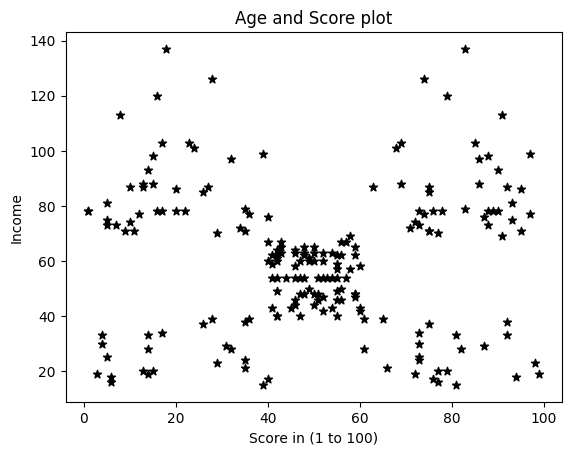

In [16]:
plt.scatter(df.score, df.income, color='black', marker='*')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

## Pair Plot

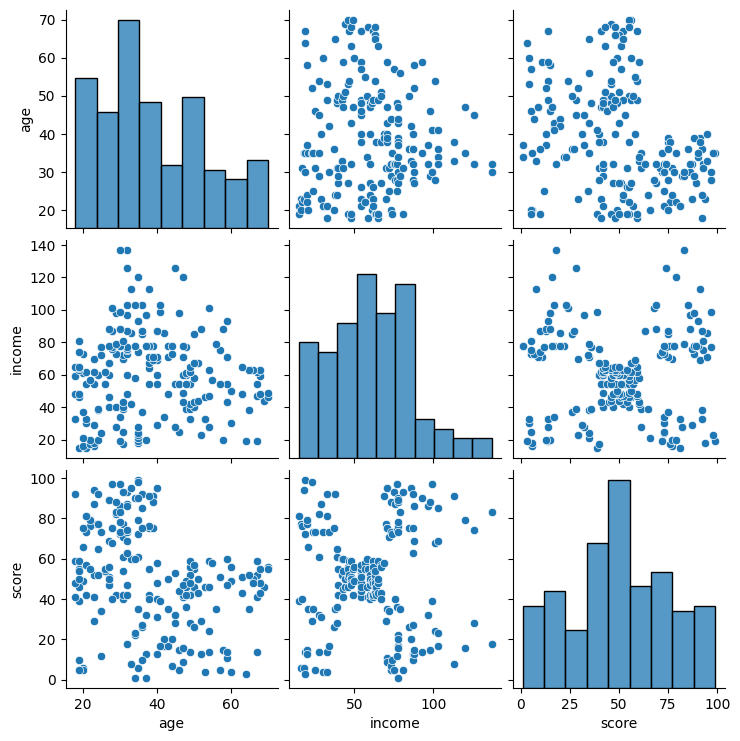

In [17]:
sns.pairplot(df[['age', 'income', 'score']])

Text(0.5, 1.0, 'Age and Score plot')

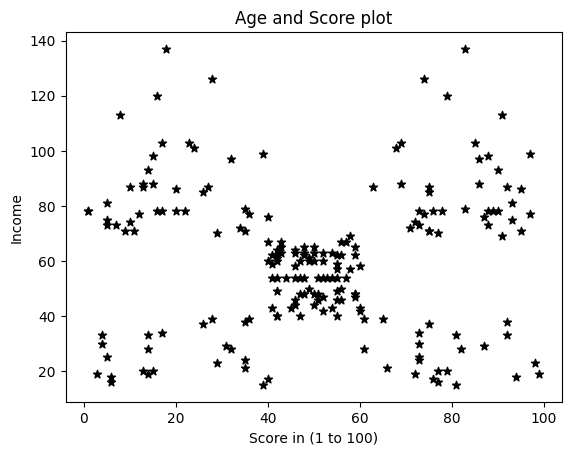

In [18]:
# income & score
plt.scatter(df.score, df.income, color='black', marker='*')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

## K-means cluster

In [19]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans()

In [21]:
km.fit(df[['score', 'income']])

KMeans()

In [22]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
df['new_cluster1'] = km.predict(df[['score', 'income']])

In [24]:
df.head()

,gender,age,income,score,new_cluster1
0,Male,19,15,39,6
1,Male,21,15,81,1
2,Female,20,16,6,6
3,Female,23,16,77,1
4,Female,31,17,40,6


## Visualization

In [25]:
df1 = df[df.new_cluster1 == 1]

In [26]:
df1.head()

,gender,age,income,score,new_cluster1
1,Male,21,15,81,1
3,Female,23,16,77,1
5,Female,22,17,76,1
7,Female,23,18,94,1
9,Female,30,19,72,1


In [27]:
df1.shape

(21, 5)

Text(0.5, 1.0, 'Age and Score plot')

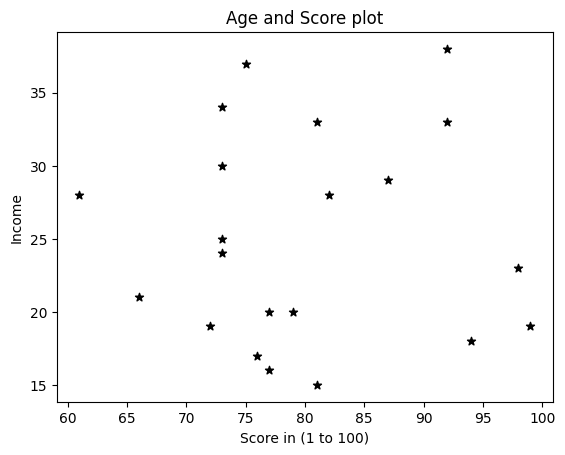

In [28]:
plt.scatter(df1.score, df1.income, color='black', marker='*')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

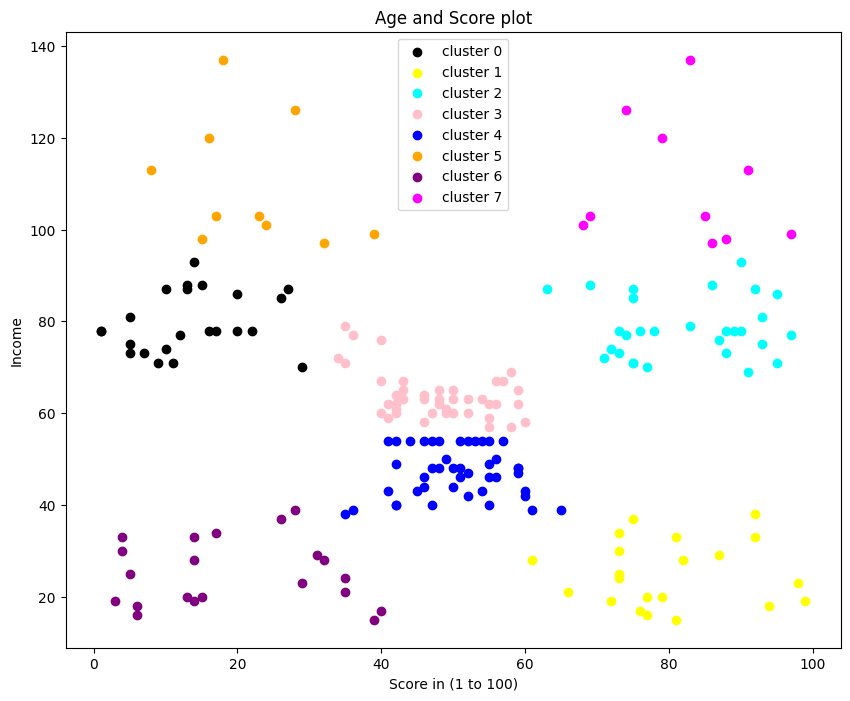

In [38]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10, 8))

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score, df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score, df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score, df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score, df5.income, color='orange', label='cluster 5')
plt.scatter(df6.score, df6.income, color='purple', label='cluster 6')
plt.scatter(df7.score, df7.income, color='magenta', label='cluster 7')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

In [39]:
center1 = km.cluster_centers_
center1

array([[ 13.39130435,  79.73913043],
       [ 80.04761905,  25.0952381 ],
       [ 82.17241379,  78.55172414],
       [ 47.66666667,  63.80952381],
       [ 50.36363636,  47.06818182],
       [ 22.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 82.        , 109.7       ]])

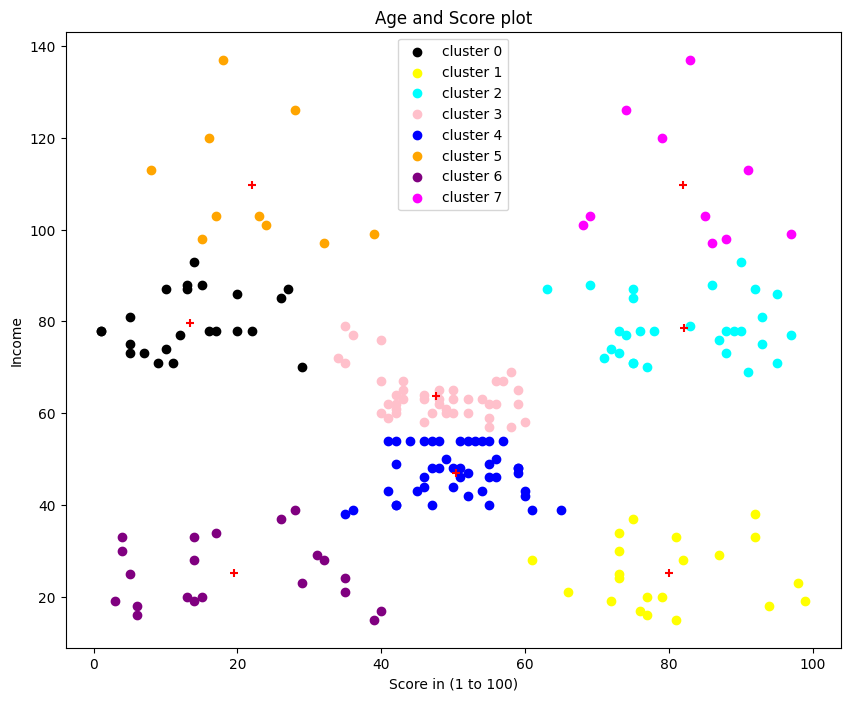

In [40]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10, 8))

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score, df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score, df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score, df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score, df5.income, color='orange', label='cluster 5')
plt.scatter(df6.score, df6.income, color='purple', label='cluster 6')
plt.scatter(df7.score, df7.income, color='magenta', label='cluster 7')

plt.scatter(center1[:,0], center1[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

## Optimizing K-Means

In [41]:
wcss = []
cluster_range = range(1, 15)

for k in cluster_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [42]:
wcss

[269981.28,
 186481.7834842546,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30566.45113025185,
 29456.17446386355,
 23751.895979986195,
 21461.94856151436,
 19226.090404040413,
 16826.80567668871,
 15030.000590435571,
 13629.76536796537]

Text(0.5, 0, 'Clusters')

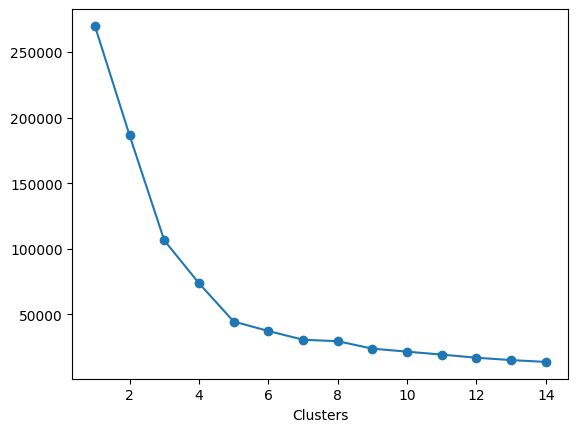

In [45]:
plt.plot(cluster_range, wcss, marker = 'o')
plt.xlabel('Clusters')